In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

C:\Users\HuanfaChen\Anaconda3\envs\sds2020\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Load the data into data frames

d1 = pd.read_csv('office_environ_data_1.csv')

In [3]:
# The data reports the responses (on a scale of 1 to 10) of 100 office workers about their subjective feelings...
# ... of well-being in relation to their working environment.
# Information on the gender of respondents is provided, along with some indices to measure the greenery...
# ... of their environment (e.g. pot plants, views of trees) and the amount of natural light.

# Let's visualise the first few rows of each data set:

d1.head()

,gender,greenery index,natural light index,reported well-being
0,M,124.7,28.4,6
1,F,67.9,64.0,6
2,M,129.4,79.5,7
3,F,111.1,130.7,8
4,F,168.2,79.1,8


# Simple regression

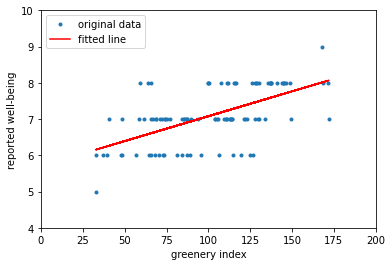

y = 0.014 x + 5.706
Rsq =  0.34523516578160884
p-value =  1.3075485893766194e-10


In [4]:
# This is a regression of well-being against greenery:

X = d1['greenery index']
Y = d1['reported well-being']

plt.xlabel('greenery index')
plt.ylabel('reported well-being')

a = plt.plot(X,Y,'.', label='original data')
plt.xlim(0,200)
plt.ylim(4,10)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

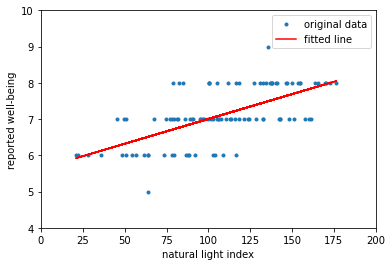

y = 0.014 x + 5.634
Rsq =  0.4104815876732613
p-value =  7.029291722352253e-13


In [5]:
# This is a regression of well-being against natural light:

X = d1['natural light index']
Y = d1['reported well-being']

plt.xlabel('natural light index')
plt.ylabel('reported well-being')

a = plt.plot(X,Y,'.',label='original data')
plt.xlim(0,200)
plt.ylim(4,10)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

# Multiple regression

In [6]:
# This package will allow for multilinear regression. You can also use it for simple linear regression.
# If you do not have it, you can download it from here:
# http://statsmodels.sourceforge.net/install.html
# After installing, you may need to close and reopen Canopy or reboot your computer.

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
# It turns out it's easier to work with columns with single word names, so...
d1 = d1.rename(columns = {'reported well-being':'wellbeing',
                          'greenery index':'greenery',
                          'natural light index':'light'})

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='wellbeing ~ greenery + light',data=d1).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              wellbeing   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           8.29e-30
Time:                        14:30:08   Log-Likelihood:                -48.146
No. Observations:                 100   AIC:                             102.3
Df Residuals:                      97   BIC:                             110.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2670      0.172     24.853      0.0

In [8]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1, pval_2 = multi_regression_model_1.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))

y = 0.014 x1 + 0.014 x2 + 4.267
R^2     =  0.748588335477443
p-value_1 =  0.0
p-value_2 =  0.0


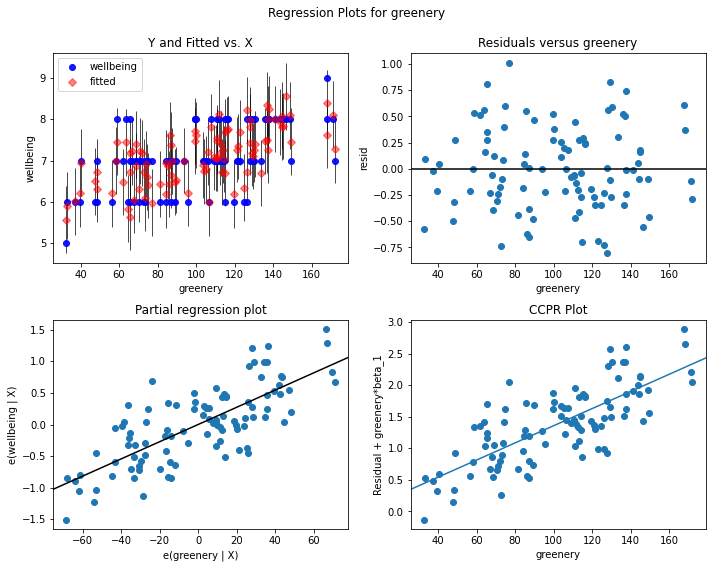

In [9]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'greenery', fig=fig)

# RSquared of simple and multiple regression

In [10]:
# Now let's move on to an alternative version of the same data set:

d2 = pd.read_csv('office_environ_data_2.csv')
d2.head()

,gender,greenery index,natural light index,reported well-being
0,M,86.1,93.8,7
1,M,110.5,70.0,7
2,F,77.6,93.0,7
3,M,130.7,99.6,8
4,M,68.7,110.3,7


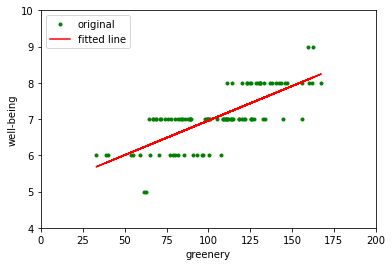

y = 0.019 x + 5.055
Rsq =  0.5610338746441706
p-value =  3.210026144611256e-19


In [11]:
# This is a regression of well-being against greenery:

X = d2['greenery index']
Y = d2['reported well-being']

a = plt.plot(X,Y,'g.',label='original')
plt.xlim(0,200)
plt.ylim(4,10)
plt.xlabel('greenery')
plt.ylabel('well-being')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line.
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

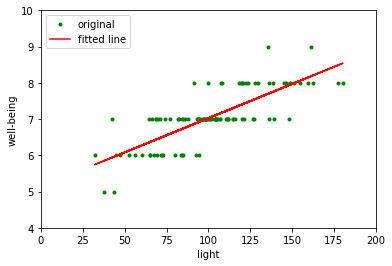

y = 0.019 x + 5.137
Rsq =  0.5991781707213336
p-value =  3.615753891493599e-21


In [12]:
# This is a regression of well-being against natural light:

X = d2['natural light index']
Y = d2['reported well-being']

a = plt.plot(X,Y,'g.',label='original')
plt.xlim(0,200)
plt.ylim(4,10)
plt.xlabel('light')
plt.ylabel('well-being')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line.
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [13]:
# Perform the multilinear regression:

d2 = d2.rename(columns = {'reported well-being':'wellbeing',
                          'greenery index':'greenery',
                          'natural light index':'light'})
multi_regression_model_2 = smf.ols(formula='wellbeing ~ greenery + light',data=d2).fit()

In [14]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2 = multi_regression_model_2.params
rsq                    = multi_regression_model_2.rsquared
pval_0, pval_1, pval_2 = multi_regression_model_2.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))

y = 0.012 x1 + 0.013 x2 + 4.56
R^2     =  0.741004206602793
p-value_1 =  0.0
p-value_2 =  0.0


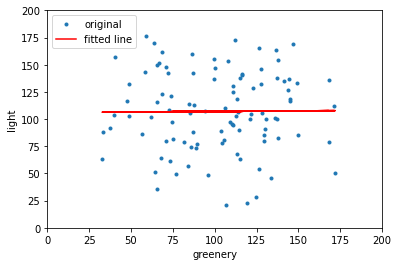

y = 0.01 x + 105.976
Rsq =  9.13718302053549e-05
p-value =  0.9248001760628872

Correlation between greenery and natural light indices: 0.01


In [15]:
# The first data set showed Rsq values of approx. 30-40% when treating each variable separately...
# while the combined model showed an Rsq value of 75%.

# The second data set showed Rsq values of approx. 50-60% when treating each variable separately...
# while the combined model showed an Rsq value of 74%.

# To understand why, we look at the correlation between the explanatory variables in each data set.

# (The uncorrelated explanatory variables of set 1 provide completely independent information about well-being...
# ... while the correlated expl. variables of set 2 have an overlap in the information they provide...
# ... so there is not such a big improvement in Rsq in the combined model for set 2, as there was for set 1)

# Data set 1:
# What is the relationship or correlation between 'greenery' and 'light'?

X = d1['greenery']
Y = d1['light']

a = plt.plot(X,Y,'.', label = 'original')
plt.xlim(0,200)
plt.ylim(0,200)

plt.xlabel('greenery')
plt.ylabel('light')
slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)
print()

corr_green_light, corr_p_val = sps.pearsonr(X, Y)
print("Correlation between greenery and natural light indices:", round(corr_green_light,3))

y = 0.591 x + 39.401
Rsq =  0.3213041801463353
p-value =  7.854207705297026e-10

Correlation between greenery and natural light indices: 0.567


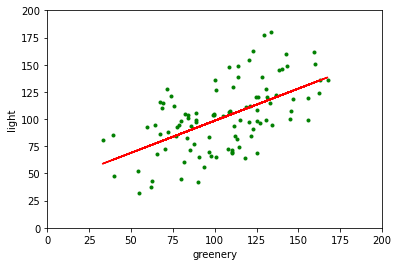

In [16]:
# Data set 2:

X = d2['greenery']
Y = d2['light']

a = plt.plot(X,Y,'g.', label = 'original')
plt.xlim(0,200)
plt.ylim(0,200)
plt.xlabel('greenery')
plt.ylabel('light')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)
print()

corr_green_light, corr_p_val = sps.pearsonr(X, Y)
print("Correlation between greenery and natural light indices:", round(corr_green_light,3))

Hope this gives you an expression of the colinearity between two variables, and how they influence the regression result.

# Using categorical variables

In [17]:
# Now to look at gender (in the first data set only)
# First, create a new column to convert the genders into 1s and 0s:
# using the get_dummies() function from pandas

gender_one_hot = pd.get_dummies(d1['gender'], prefix = 'gender', drop_first=True)
d1 = d1.drop('gender', axis = 1)
d1 = d1.join(gender_one_hot)

In [18]:
# Display the first few rows:

d1.head()

,greenery,light,wellbeing,gender_M
0,124.7,28.4,6,1
1,67.9,64.0,6,0
2,129.4,79.5,7,1
3,111.1,130.7,8,0
4,168.2,79.1,8,0


In [19]:
# Perform a multiple linear regression including gender.
# The p-value for gender is very high, indicating that it is very likely not to be linked to well-being.
# There does not seem to be any reason to include gender.

multi_regression_model_1A = smf.ols(formula='wellbeing ~ greenery + light + gender_M',data=d1).fit()

beta_0, beta_1, beta_2, beta_3 = multi_regression_model_1A.params
rsq                            = multi_regression_model_1A.rsquared
pval_0, pval_1, pval_2, pval_3 = multi_regression_model_1A.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_3,3), "x3 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))

y = 0.014 x1 + 0.014 x2 + 0.021 x3 + 4.256
R^2     =  0.7487633838520811
p-value_1 =  0.0
p-value_2 =  0.0
p-value_3 =  0.796
